In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt                   #importing libraries


# There are 5 different leagues, I will be performing EDA on EPL and La Liga dataset

In [2]:
data=pd.read_csv("C:\\Users\\vijay\\Downloads\\Football teams.csv")           #loading files

In [3]:
data.head(20)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
6,Juventus,Serie A,77,15.7,76,6,55.4,88.3,11.4,6.85
7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
8,Borussia Dortmund,Bundesliga,75,14.6,43,1,57.5,85.5,12.8,6.84
9,Atletico Madrid,LaLiga,67,12.1,100,0,51.8,83.1,14.4,6.84


In [4]:
data.shape                                       #The shape attribute of pandas stores the number of rows and coloum as a tuple 

(98, 10)

In [5]:
data.isnull().sum()                                                        #Return the number of missing values in the dataset

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [6]:
data.tail(20)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
78,Eibar,LaLiga,29,11.9,67,3,49.2,72.6,24.4,6.53
79,Werder Bremen,Bundesliga,36,10.6,63,3,45.2,76.2,18.3,6.52
80,Fiorentina,Serie A,47,9.8,86,5,46.8,81.0,14.2,6.52
81,Nimes,Ligue 1,40,10.3,57,5,45.8,77.5,14.0,6.52
82,West Bromwich Albion,Premier League,35,8.9,51,4,41.0,72.2,19.1,6.51
83,FC Koln,Bundesliga,34,10.6,62,1,47.1,77.3,18.5,6.51
84,Deportivo Alaves,LaLiga,36,9.1,87,8,44.6,72.9,22.6,6.50
85,Levante,LaLiga,46,10.1,70,1,51.5,80.1,12.2,6.50
86,Spezia,Serie A,52,10.2,92,5,51.6,81.1,14.4,6.50
87,Getafe,LaLiga,28,9.5,117,7,44.4,66.5,22.8,6.49


In [48]:
data.groupby('Tournament')['Team'].nunique()                                #Return the number of unique value for each coloum.

Tournament
Bundesliga        18
LaLiga            20
Ligue 1           20
Premier League    20
Serie A           20
Name: Team, dtype: int64

# Number of Teams from each Tournament

# Creating dataset for EPL first

In [8]:
EPL=data.loc[data.Tournament=='Premier League']                                      #used to group premier leauge

In [9]:
EPL.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
11,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83
12,Liverpool,Premier League,68,16.0,40,0,59.0,85.7,14.3,6.82


In [ ]:
""""""Leading goal scorer""""""                             

Text(0.5, 1.0, 'Total Goals of top 5 EPL Teams')

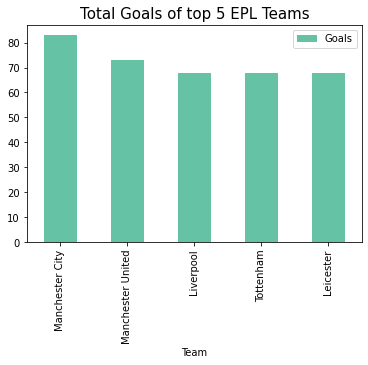

In [10]:
EPL[['Team','Goals']].sort_values(by='Goals',ascending=False)[:5].plot(kind='bar',x='Team',y="Goals",cmap='Set2')
plt.title("Total Goals of top 5 EPL Teams",fontsize=15)

In [11]:
EPL.describe()                                                            #To get a descriptive statistics summary of dataframe

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000
mean,51.200000,12.095000,54.750000,2.40000,49.995000,80.61000,16.610000,6.716500
std,16.728796,2.133313,8.503095,1.63514,5.943548,4.66554,2.677371,0.130476
min,20.000000,8.500000,40.000000,0.00000,41.000000,71.60000,12.800000,6.460000
25%,39.000000,10.475000,48.000000,1.00000,44.250000,77.57500,14.450000,6.627500
50%,51.000000,12.150000,53.000000,2.50000,50.350000,81.25000,16.300000,6.710000
75%,63.500000,13.700000,61.000000,3.00000,53.525000,83.60000,18.500000,6.812500
max,83.000000,16.000000,73.000000,6.00000,60.800000,89.40000,23.400000,7.010000


Text(1.0, 1.0, 'Shots per game vs Team in EPL')

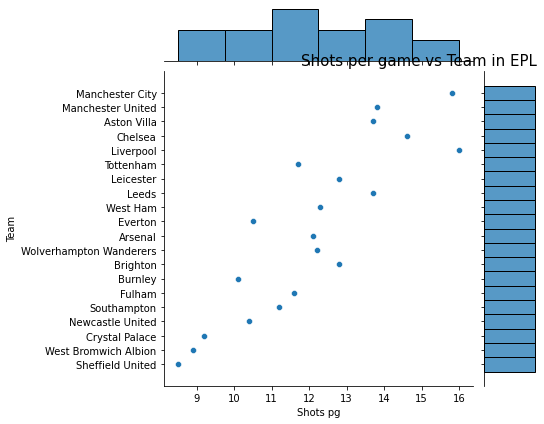

In [12]:
sns.jointplot(x='Shots pg',y='Team',data=EPL)
plt.title("Shots per game vs Team in EPL",fontsize=15,loc="right")

In [13]:
top_shots_pg=EPL[['Team','Goals','Shots pg']]  

In [14]:
top_shots_pg.head()

,Team,Goals,Shots pg
0,Manchester City,83,15.8
5,Manchester United,73,13.8
7,Aston Villa,55,13.7
11,Chelsea,58,14.6
12,Liverpool,68,16.0


Text(0.5, 1.0, 'Line Plot for Goals vs Team in EPL')

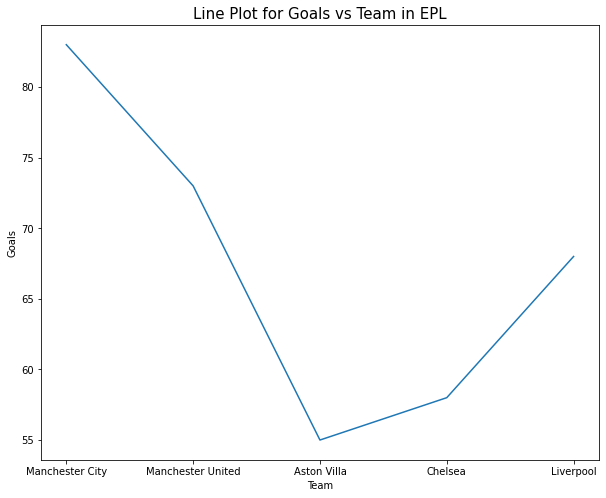

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Team',y='Goals',data=top_shots_pg[:5])
plt.title("Line Plot for Goals vs Team in EPL",fontsize=15)

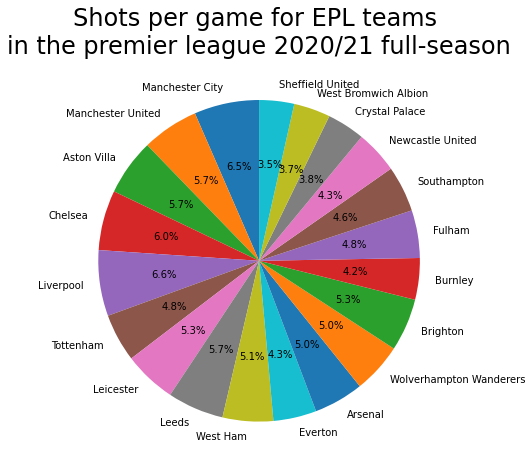

In [16]:
plt.figure(figsize=(7,7))
labels = top_shots_pg.index
plt.pie(x='Shots pg',data=top_shots_pg,labels='Team',startangle=90, autopct='%.1f%%')
plt.title("Shots per game for EPL teams \nin the premier league 2020/21 full-season", fontsize = 24) 

plt.tight_layout() 
plt.show()

In [17]:
EPL['Offenses']=EPL['red_cards']+ EPL['yellow_cards']

C:\Users\vijay\AppData\Local\Temp/ipykernel_4928/811571502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL['Offenses']=EPL['red_cards']+ EPL['yellow_cards']


Text(0.5, 1.0, 'Top 5 Teams with most Offenses')

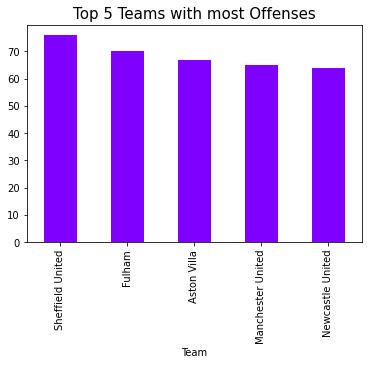

In [18]:
EPL.groupby('Team')['Offenses'].sum().nlargest(5).plot(kind='bar',x='Team',y='Offenses',cmap='rainbow')
plt.title("Top 5 Teams with most Offenses",fontsize=15)

In [19]:
epl_possesion=EPL.sort_values(by='Possession%',ascending=False)

In [20]:
epl_possesion.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Offenses
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01,48
12,Liverpool,Premier League,68,16.0,40,0,59.0,85.7,14.3,6.82,40
11,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83,52
22,Leeds,Premier League,62,13.7,61,1,55.1,80.8,14.5,6.77,62
5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85,65


Text(0.5, 1.0, 'Top Possession Teams from EPL are')

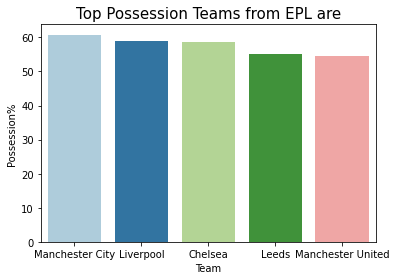

In [21]:
sns.barplot(x='Team',y='Possession%',data=epl_possesion[:5],palette='Paired')
plt.title("Top Possession Teams from EPL are", fontsize=15)

Text(0.5, 1.0, 'Goals vs Shots Per Game Plot for Top 5 Teams')

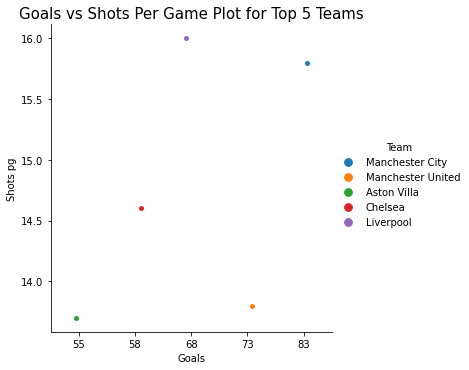

In [22]:
sns.catplot(x='Goals',y='Shots pg',data=EPL[:5],hue="Team")
plt.title("Goals vs Shots Per Game Plot for Top 5 Teams",fontsize=15)

In [23]:
EPL['goalS_ratio']= EPL['Goals']/EPL['Shots pg']

C:\Users\vijay\AppData\Local\Temp/ipykernel_4928/1208452435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL['goalS_ratio']= EPL['Goals']/EPL['Shots pg']


Text(0.5, 1.0, ' Goals scroed vs Shots taken per game ratio in EPL')

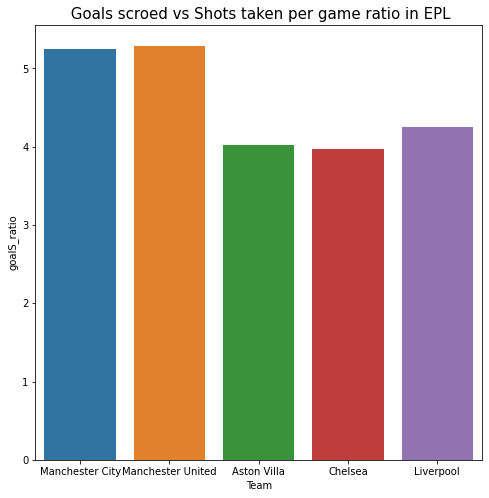

In [24]:
plt.figure(figsize=(8,8))
sns.barplot(x='Team',y='goalS_ratio',data=EPL[:5])
plt.title(" Goals scroed vs Shots taken per game ratio in EPL",fontsize=15)

<AxesSubplot:xlabel='Pass%', ylabel='Density'>

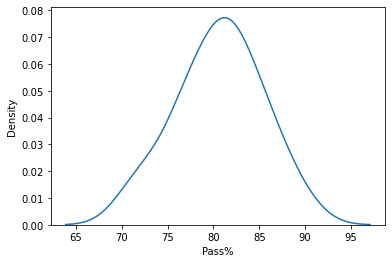

In [25]:
sns.kdeplot(x='Pass%',data=EPL)

Text(0.5, 1.0, 'The Possession vs Pass Graph')

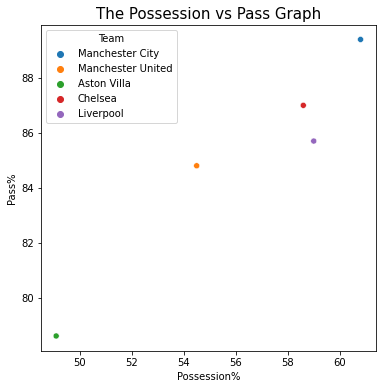

In [26]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Possession%',y='Pass%',data=EPL[:5],hue='Team')

plt.title("The Possession vs Pass Graph",fontsize=15)

Text(0.5, 1.0, 'Top 5 rated teams in EPL')

<Figure size 576x576 with 0 Axes>

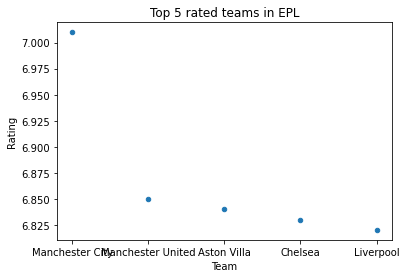

In [27]:
plt.figure(figsize=(8,8))
EPL.sort_values(by='Rating',ascending=False)[:5].plot(kind='scatter',x='Team',y='Rating',cmap='twilight')
plt.title("Top 5 rated teams in EPL")

# Details for La Liga

In [28]:
liga=data.loc[data.Tournament=='LaLiga']

In [29]:
liga.head(20)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
9,Atletico Madrid,LaLiga,67,12.1,100,0,51.8,83.1,14.4,6.84
29,Sevilla,LaLiga,53,12.1,75,2,58.7,86.2,16.6,6.70
37,Villarreal,LaLiga,60,10.7,65,5,54.3,84.4,13.0,6.66
38,Real Sociedad,LaLiga,59,11.3,81,1,53.7,80.8,17.9,6.65
40,Real Betis,LaLiga,50,11.7,87,8,52.9,82.0,16.4,6.64
58,Valencia,LaLiga,50,10.3,77,5,47.9,79.4,16.3,6.60
59,Celta Vigo,LaLiga,55,9.4,104,5,52.0,79.9,16.5,6.60
71,SD Huesca,LaLiga,34,10.7,68,2,48.7,79.8,15.7,6.55


Text(0.5, 1.0, 'Total Goals of top 5 La Liga Teams')

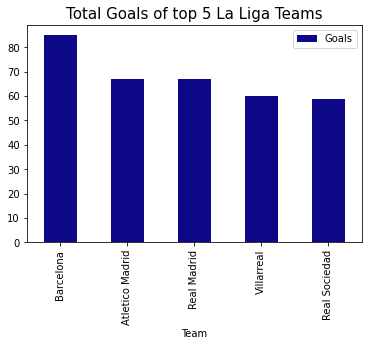

In [30]:
liga[['Team','Goals']].sort_values(by='Goals',ascending=False)[:5].plot(kind='bar',x='Team',y="Goals",cmap='plasma')
plt.title("Total Goals of top 5 La Liga Teams",fontsize=15)

Text(1.0, 1.0, 'Shots per game vs Team in La Liga')

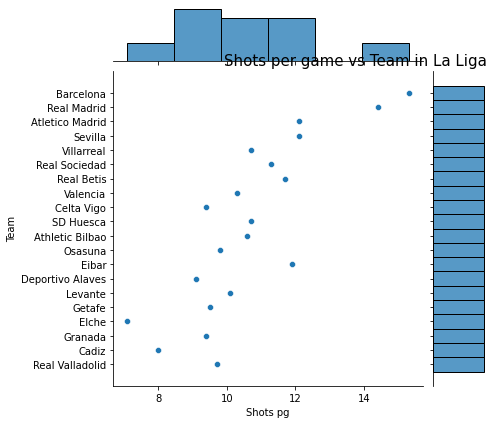

In [31]:
sns.jointplot(x='Shots pg',y='Team',data=liga)
plt.title("Shots per game vs Team in La Liga",fontsize=15,loc="right")

Text(0.5, 1.0, 'Line Plot for Goals vs Team in La Liga')

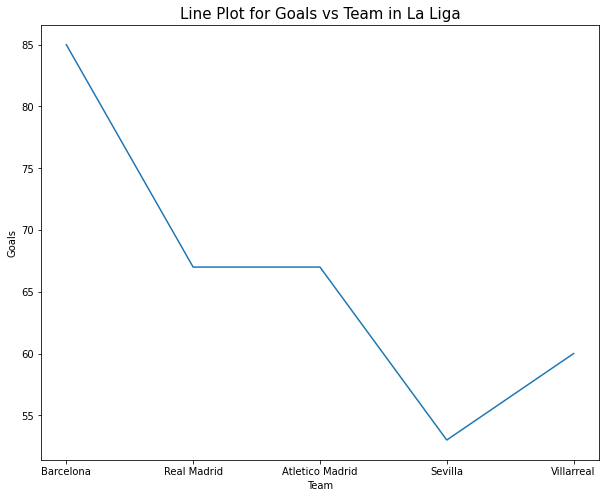

In [32]:
top_shots_pg_liga=liga[['Team','Goals','Shots pg']]
top_shots_pg_liga.head()
plt.figure(figsize=(10,8))
sns.lineplot(x='Team',y='Goals',data=top_shots_pg_liga[:5])
plt.title("Line Plot for Goals vs Team in La Liga",fontsize=15)

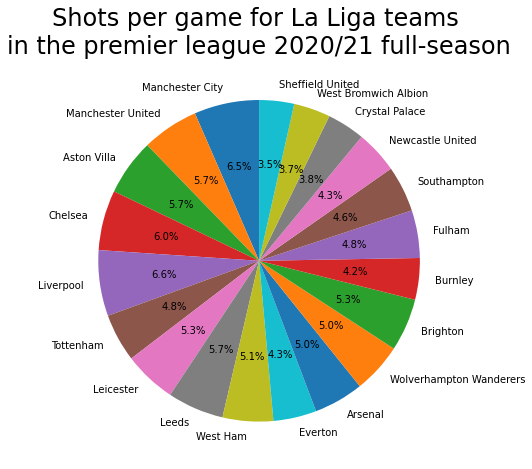

In [33]:
plt.figure(figsize=(7,7))
labels = top_shots_pg_liga.index
plt.pie(x='Shots pg',data=top_shots_pg,labels='Team',startangle=90, autopct='%.1f%%')
plt.title("Shots per game for La Liga teams \nin the premier league 2020/21 full-season", fontsize = 24) 
plt.tight_layout() 
plt.show()

In [34]:
liga['Offenses']=liga['red_cards']+ liga['yellow_cards']

C:\Users\vijay\AppData\Local\Temp/ipykernel_4928/2382603002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liga['Offenses']=liga['red_cards']+ liga['yellow_cards']


Text(0.5, 1.0, 'Top 5 Teams with most Offenses')

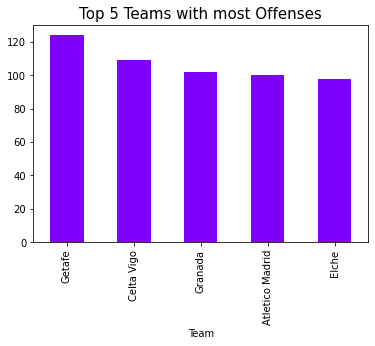

In [35]:
liga.groupby('Team')['Offenses'].sum().nlargest(5).plot(kind='bar',x='Team',y='Offenses',cmap='rainbow')
plt.title("Top 5 Teams with most Offenses",fontsize=15)

Text(0.5, 1.0, 'Top Possession Teams from La Liga are')

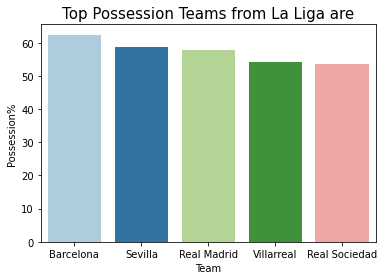

In [36]:
liga_possesion=liga.sort_values(by='Possession%',ascending=False)
sns.barplot(x='Team',y='Possession%',data=liga_possesion[:5],palette='Paired')
plt.title("Top Possession Teams from La Liga are", fontsize=15)

Text(0.5, 1.0, 'Goals vs Shots Per Game Plot for Top 5 Teams')

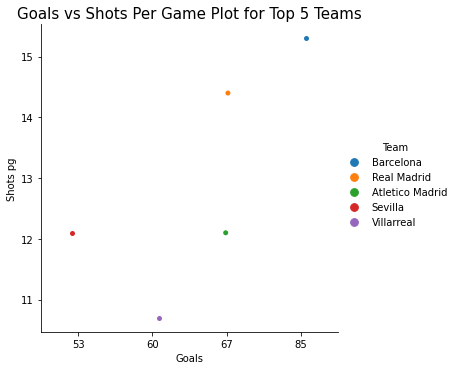

In [37]:
sns.catplot(x='Goals',y='Shots pg',data=liga[:5],hue="Team")
plt.title("Goals vs Shots Per Game Plot for Top 5 Teams",fontsize=15)

C:\Users\vijay\AppData\Local\Temp/ipykernel_4928/2520886546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liga['goalS_ratio']= liga['Goals']/liga['Shots pg']


Text(0.5, 1.0, ' Goals scroed vs Shots taken per game ratio in La Liga')

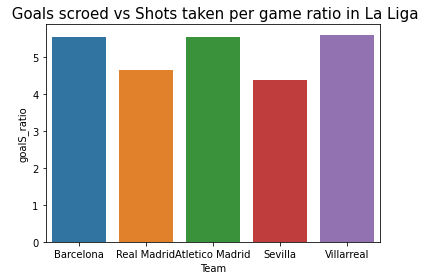

In [38]:
liga['goalS_ratio']= liga['Goals']/liga['Shots pg']

sns.barplot(x='Team',y='goalS_ratio',data=liga[:5])
plt.title(" Goals scroed vs Shots taken per game ratio in La Liga",fontsize=15)

<AxesSubplot:xlabel='Pass%', ylabel='Density'>

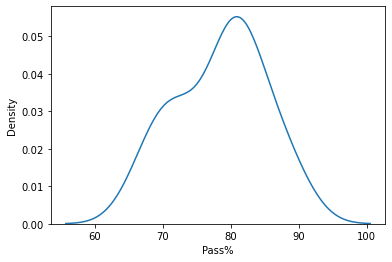

In [39]:
sns.kdeplot(x='Pass%',data=liga)

Text(0.5, 1.0, 'The Possession vs Pass Graph')

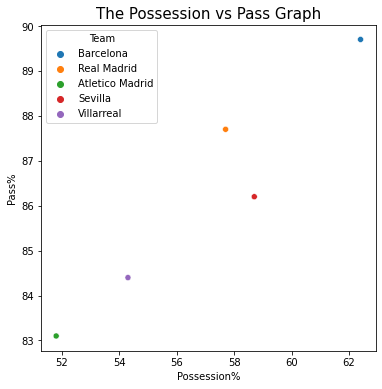

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Possession%',y='Pass%',data=liga[:5],hue='Team')

plt.title("The Possession vs Pass Graph",fontsize=15)

Text(0.5, 1.0, 'Top 5 rated teams in La Liga')

<Figure size 576x576 with 0 Axes>

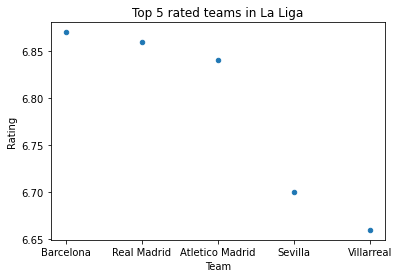

In [41]:
plt.figure(figsize=(8,8))
liga.sort_values(by='Rating',ascending=False)[:5].plot(kind='scatter',x='Team',y='Rating',cmap='twilight')
plt.title("Top 5 rated teams in La Liga")

# Now its time to Check the different leagues and their details

C:\Users\vijay\AppData\Local\Temp/ipykernel_4928/3287098047.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tournaments=data.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')


Text(0.5, 1.0, ' The different league details')

<Figure size 720x720 with 0 Axes>

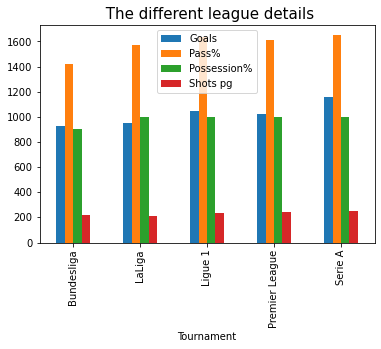

In [42]:
plt.figure(figsize=(10,10))
tournaments=data.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')
plt.title(" The different league details", fontsize=15)

Text(0.5, 1.0, 'Tournament and Shots per game in them')

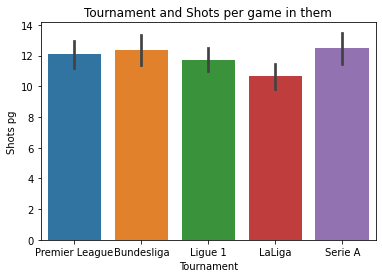

In [43]:
sns.barplot(x='Tournament',y='Shots pg',data=data)
plt.title("Tournament and Shots per game in them")

Text(0.5, 1.0, 'Tournament and Possession in them')

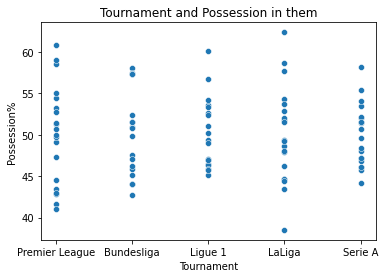

In [44]:
sns.scatterplot(x='Tournament',y='Possession%',data=data)
plt.title("Tournament and Possession in them")

Text(0.5, 1.0, 'Tournament and Pass % in them')

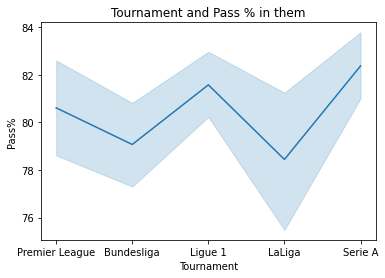

In [45]:
sns.lineplot(x='Tournament',y='Pass%',data=data)
plt.title("Tournament and Pass % in them")

Text(0.5, 1.0, 'Tournament and Offenses in them')

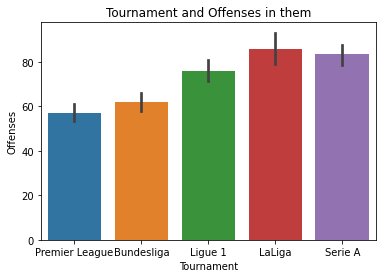

In [46]:
data['Offenses']=data['red_cards']+data['yellow_cards']
sns.barplot(x='Tournament',y='Offenses',data=data)
plt.title("Tournament and Offenses in them")

In [ ]:
Most Goals : Seria A​

Most Possesion : La Liga​

Most Pass % : League1​

Most Offenses : La Liga​

Most shots taken per game : Seria A​